___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Vitor Pereira



___

## INTRODUÇÃO

O objetivo do projeto é criar um modelo preditivo conduzido por uma análise de dados a partir de um dataset escolhido, e a partir de variáveis qualitativas e quantitativas correlacionadas, estimar o valor de uma variável quantitativa. Para tanto, será feita uma análise preditiva da variável quantitativa "renda", baseando-se no uso da PNAD 2015 (dataset utilizado no projeto 1), utilizando as variáveis explicativas que foram julgadas relevantes relevantes: Estado de nascimento, sexo, idade, cor ou raça, grau de alfabetização, e rendimento domiciliar per capita no mês da pesquisa. 
Para que seja possível fazer uma análise bem feita a partir do dataset, é necessário um conhecimento prévio sobre as variáveis que serão trabalhadas, para isso, será feita uma análise descritiva de algumas varíaveis explicativas, relecionando-as à renda.
Feito isso, serão adotados dois modelos para a predição da renda, pela o Modelo de Predição pela Média, que por sua vez mais simples, consiste na previsão de um valor fixo para o valor de renda prevista. E o segundo método, o Modelo de Regressão Linear Múltipla, que consiste em prever um valor de uma variável quantitativa escolhida, a partir de uma função que relaciona variáveis explicativas (quantitativas e qualitativas).
Cada um dos métodos adotados contará com um modelo de validação da previsão feita, possibilitado pela utilização das técnicas do cálculo dos coeficientes R2 e RMS, possibilitando assim que o valor previsto para a variável renda, tenha sua qualidade avaliada em cada modelo de predição feito.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
import math as math
from scipy import stats
import statsmodels.api as sm

In [12]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

valores=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


dados=pd.DataFrame({

    'Regiao' :valores.UF,
    'Sexo' :valores.V0302,
    'Idade' :valores.V8005,
    'Cor_ou_raca':valores.V0404,
    'Sabe_ler_e_escrever' :valores.V0601,
    'renda' :valores.V4720,
    'Rendimento_mensal_domiciliar_per_capita' :valores.V4742
    })



dados=dados[['Regiao','Sexo','Idade','Cor_ou_raca','Sabe_ler_e_escrever','renda','Rendimento_mensal_domiciliar_per_capita']]


dados.Sexo=dados.Sexo.astype('category')
dados.Sexo.cat.categories=(['Masculino','Feminino'])

dados.Cor_ou_raca=dados.Cor_ou_raca.astype('category')
dados.Cor_ou_raca.cat.categories=(['Indígena','Branca','Preta','Amarela','Parda','Sem declaração'])

dados.Sabe_ler_e_escrever=dados.Sabe_ler_e_escrever.astype('category')
dados.Sabe_ler_e_escrever.cat.categories=('Sim','Não')


def Estados(linha):
    if linha>=11 and linha<=17:
        return 'Norte'
    if linha>=21 and linha<=29:
        return 'Nordeste'
    if linha>=31 and linha<=35:
        return 'Sudeste'
    if linha>=41 and linha<=43:
        return 'Sul'
    if linha>=50 and linha<=53:
        return 'Centro-Oeste'
    
dados.Regiao=dados.Regiao.apply(Estados)

dados=dados[dados.renda<4000]

Esperamos trabalhar no diretório
C:\Users\vitor\Documents\DP dados


### BASE DE DADOS

In [13]:
dados

,Regiao,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
0,Norte,Masculino,23,Parda,Sim,800.0,8.000000e+02
1,Norte,Feminino,23,Branca,Sim,1150.0,1.150000e+03
2,Norte,Feminino,35,Parda,Sim,880.0,7.930000e+02
3,Norte,Masculino,34,Parda,Sim,3000.0,7.930000e+02
4,Norte,Feminino,11,Parda,Sim,0.0,7.930000e+02
7,Norte,Feminino,18,Parda,Sim,880.0,7.930000e+02
8,Norte,Masculino,46,Branca,Sim,3500.0,2.900000e+03
9,Norte,Feminino,81,Parda,Sim,2300.0,2.900000e+03
10,Norte,Feminino,71,Branca,Sim,1990.0,1.990000e+03
11,Norte,Feminino,47,Parda,Sim,700.0,3.500000e+02


Nessa primeira parte do projeto foram importadas as funções a serem utilizadas no projeto, o dataframe foi atribuido a uma  variável e para ela foram relacionadas as variáveis a serem utilizadas no projeto, presentes do dataset.
Em seguida a essas variáveis, foram aplicados filtros que para as qualitativas, utilizando a função 'astype('category')' foram transformadas em formato texto para facilitar a vizualização do dataset. além disso para a variável 'Regioes' foi aplicada um função que separa os estados nas regiões correspondentes no mapa brasileiro.
E por último porém não menos importante, a variável quantitativa renda foi limitada a um valor de 40.000 por causa de valores presentes no database que não correspondiam com a realidade ou não seriam importantes para a análise.


### ANÁLISE DESCRITIVA

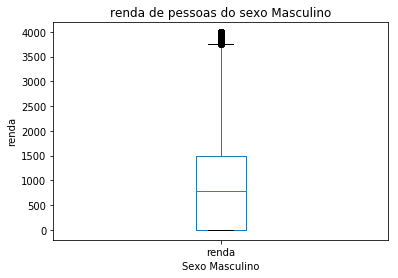

In [14]:
BoxMasc=dados[(dados.Sexo == "Masculino")]
BoxFem=dados[(dados.Sexo == "Feminino")]

plot = BoxMasc.renda.plot(kind='box',title='.')

plt.ylabel('renda')
plt.xlabel('Sexo Masculino')
plt.title('renda de pessoas do sexo Masculino')
plt.show()

In [15]:
BoxMasc.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,135776.000000,135776.000000,1.355600e+05
mean,36.806453,950.187146,1.096194e+10
std,18.770094,881.788604,1.041242e+11
min,10.000000,0.000000,0.000000e+00
25%,21.000000,0.000000,3.790000e+02
50%,34.000000,788.000000,6.620000e+02
75%,50.000000,1500.000000,1.060000e+03
max,107.000000,3991.000000,1.000000e+12


Text(0.5,1,'renda de pessoas do sexo Masculino')

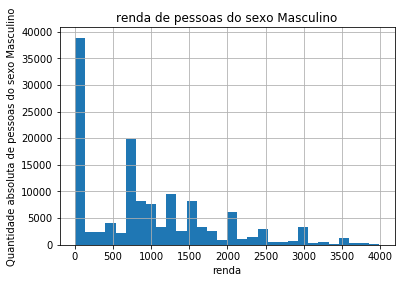

In [16]:
BoxMasc.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas do sexo Masculino')
plt.xlabel('renda')
plt.title('renda de pessoas do sexo Masculino')

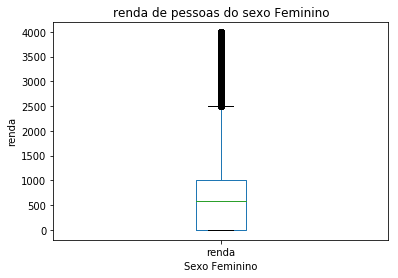

In [17]:
plot = BoxFem.renda.plot(kind='box',title='.')#, color='red')

plt.ylabel('renda')
plt.xlabel('Sexo Feminino')
plt.title('renda de pessoas do sexo Feminino')
plt.show()

In [18]:
BoxFem.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,152513.000000,152513.000000,1.521990e+05
mean,39.151594,670.510901,1.355462e+10
std,19.244465,771.069458,1.156330e+11
min,10.000000,0.000000,0.000000e+00
25%,23.000000,0.000000,3.790000e+02
50%,37.000000,580.000000,6.670000e+02
75%,53.000000,1000.000000,1.121000e+03
max,115.000000,3992.000000,1.000000e+12


Text(0.5,1,'renda de pessoas do sexo Feminino')

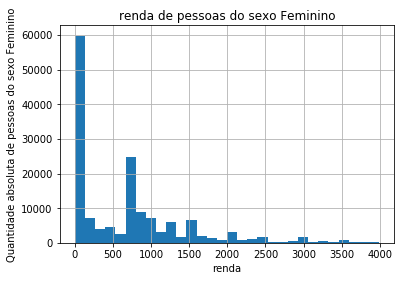

In [19]:
BoxFem.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas do sexo Feminino')
plt.xlabel('renda')
plt.title('renda de pessoas do sexo Feminino')

Nessa primeira análise descritiva foram relacionados o sexo do entrevistado e a renda declarada. Para tanto, foram gerados 2 graficos para cada sexo, o primeiro um boxplot de renda para pessoas daquele sexo, e o segundo um histograma da quantidade absoluta de pessoas por renda declarada para pessoas daquele sexo. Além disso foi gerada uma tabela onde são dadas informações importantes sobre a renda de pessoas daquele sexo. Dado isso podemos por exemplo comparar a média de renda de um homem (950.187146) e de uma mulher (670.510901).
Pode-se observar que claremente os entrevistados do sexo masculino possuem rendas em geral maiores que a das entrevistadas, não só observando a média, mas também o comportamento dos gráficos e dos os quartis que representam a renda, que em geral dos homens são mais elevados.

In [20]:
Grafico_cor_ou_raca=dados.Cor_ou_raca.value_counts()
Grafico_cor_ou_raca

Parda             141483
Branca            115251
Preta              29269
Indígena            1284
Amarela              998
Sem declaração         4
Name: Cor_ou_raca, dtype: int64

Text(0.5,1,'Porcentagem de pessoas que de cada cor ou raça')

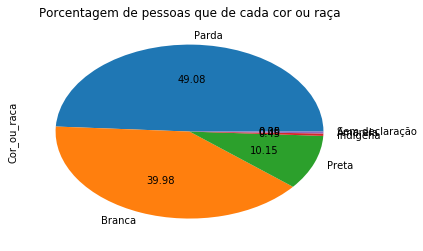

In [21]:
Grafico_cor_ou_raca.plot(kind='pie',autopct="%0.2f")
plt.title('Porcentagem de pessoas que de cada cor ou raça')

In [22]:
BoxParda=dados[(dados.Cor_ou_raca == 'Parda')]
BoxIndigena=dados[(dados.Cor_ou_raca == 'Indígena')]
BoxBranca=dados[(dados.Cor_ou_raca == 'Branca')]
BoxPreta=dados[(dados.Cor_ou_raca == 'Preta')]
BoxAmarela=dados[(dados.Cor_ou_raca == 'Amarela' )]


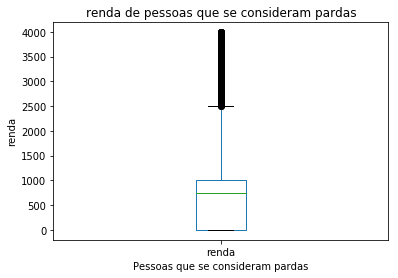

In [23]:
plot = BoxParda.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram pardas')
plt.title('renda de pessoas que se consideram pardas')
plt.show()

In [24]:
BoxParda.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,141483.000000,141483.000000,1.412650e+05
mean,36.550921,698.394231,9.931689e+09
std,18.553241,758.967807,9.916209e+10
min,10.000000,0.000000,0.000000e+00
25%,21.000000,0.000000,3.110000e+02
50%,34.000000,740.000000,5.460000e+02
75%,50.000000,1000.000000,8.920000e+02
max,105.000000,3991.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram pardas')

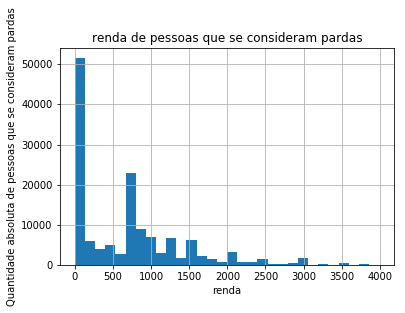

In [25]:
BoxParda.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram pardas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram pardas')

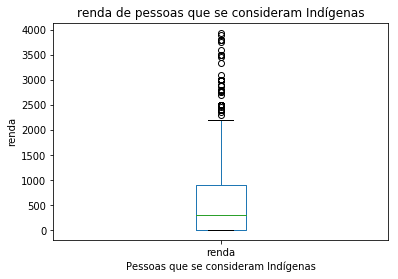

In [26]:
plot = BoxIndigena.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Indígenas')
plt.title('renda de pessoas que se consideram Indígenas')
plt.show()

In [27]:
BoxIndigena.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,1284.000000,1284.000000,1.283000e+03
mean,35.499221,624.660436,2.572097e+10
std,18.484410,768.859270,1.583633e+11
min,10.000000,0.000000,0.000000e+00
25%,20.000000,0.000000,1.870000e+02
50%,33.000000,310.000000,4.170000e+02
75%,48.000000,900.000000,7.935000e+02
max,100.000000,3940.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Indígena')

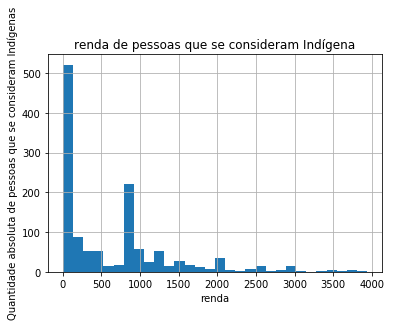

In [28]:
BoxIndigena.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Indígenas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Indígena')

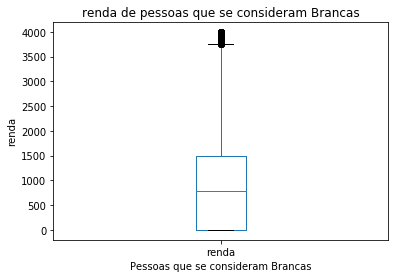

In [29]:
plot = BoxBranca.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Brancas')
plt.title('renda de pessoas que se consideram Brancas')
plt.show()

In [30]:
BoxBranca.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,115251.000000,115251.000000,1.150390e+05
mean,39.597348,933.489002,1.562079e+10
std,19.655985,922.305085,1.240037e+11
min,10.000000,0.000000,0.000000e+00
25%,23.000000,0.000000,5.000000e+02
50%,37.000000,788.000000,8.190000e+02
75%,54.000000,1500.000000,1.397000e+03
max,110.000000,3992.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Brancas')

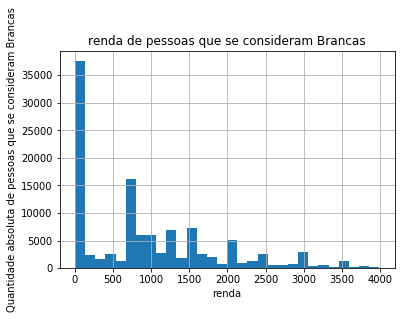

In [31]:
BoxBranca.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Brancas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Brancas')

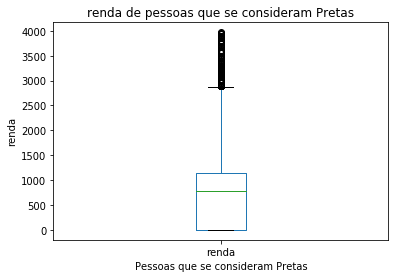

In [32]:
plot = BoxPreta.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Pretas')
plt.title('renda de pessoas que se consideram Pretas')
plt.show()

In [33]:
BoxPreta.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,29269.000000,29269.000000,2.917200e+04
mean,39.166900,786.823704,9.632525e+09
std,18.453973,758.641338,9.767326e+10
min,10.000000,0.000000,0.000000e+00
25%,24.000000,0.000000,3.500000e+02
50%,37.000000,788.000000,5.960000e+02
75%,52.000000,1150.000000,9.250000e+02
max,115.000000,3972.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Pretas')

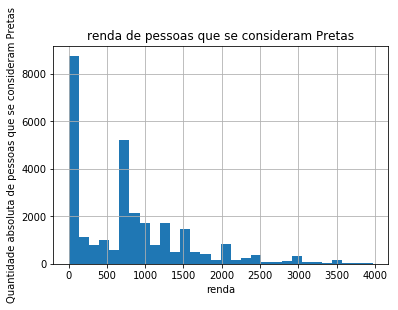

In [34]:
BoxPreta.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Pretas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Pretas')

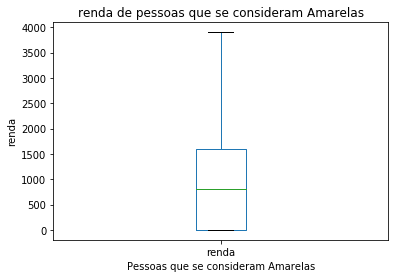

In [35]:
plot = BoxAmarela.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Amarelas')
plt.title('renda de pessoas que se consideram Amarelas')
plt.show()

In [36]:
BoxAmarela.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,998.000000,998.000000,9.960000e+02
mean,41.488978,1048.276553,3.313253e+10
std,20.688728,1053.318781,1.790725e+11
min,10.000000,0.000000,0.000000e+00
25%,24.000000,0.000000,5.440000e+02
50%,38.000000,800.000000,1.093000e+03
75%,58.000000,1600.000000,1.920000e+03
max,97.000000,3900.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Amarelas')

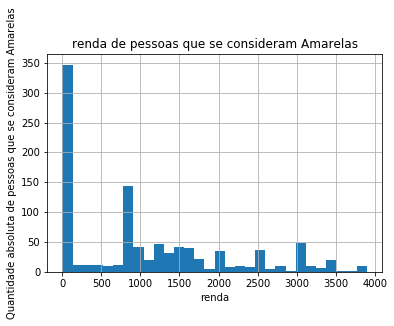

In [37]:
BoxAmarela.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Amarelas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Amarelas')

O mesmo processo foi repetido dessa vez para comparar a variável 'cor ou raça' à renda. Portanto, foram gerados 2 graficos para cada cor ou raça, o primeiro o boxplot de renda para pessoas daquela cor ou raça, e o segundo um histograma da quantidade absoluta de pessoas por renda declarada para pessoas daquela cor ou raça. Além disso foi gerada uma tabela onde são dadas informações importantes sobre a renda de pessoas daquela cor ou raça. Dado isso podemos por exemplo comparar a média de renda de das cores ou raças: Indígena = 624.660436, Branca = 933.489002, Preta = 786.823704, Amarela = 1048.276553, Parda = 698.394231. A partir disso podemos evidenciar diferenças na média salarial de grupos de cores ou raça, que são resultado da concentração de renda no Brasil, a diferença entre brencos e índios por exemplo é gritante. Isso não só baseado na análise da média, mas também no comportamento dos gráficos.

___
## MODELOS DE PREDIÇÃO:

___
## Validação cruzada:

In [38]:
#divisao teste e treinamento x 10
from sklearn.model_selection import train_test_split

for i in range (10):
    dados_treino, dados_teste = train_test_split(dados,test_size=0.1)
    
dados_treino.head(5)

,Regiao,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
30274,Norte,Masculino,21,Parda,Sim,400.0,1266.0
12427,Norte,Masculino,39,Parda,Não,0.0,70.0
211142,Sudeste,Feminino,21,Branca,Sim,1000.0,1500.0
30536,Norte,Masculino,22,Parda,Sim,600.0,630.0
176939,Sudeste,Masculino,49,Preta,Sim,1825.0,768.0


Nessa parte do código foi feita a validação cruzada, onde um processo de divisão dos dados se deu pela escolha aleatória de respostas à pesquisa, sepaando 90% das informações para treinamento dos modelos e 10% para seus respectivos testes. Esse processo foi repetido 10 vezes buscando uma melhor aleatoriedade e uma otimização dos resultados.

___
## MODELO DE PREDIÇÃO PELA MÉDIA:

In [39]:
Media_renda=dados_treino.renda.mean()
Media_renda

#print(len(dados_treino))

802.0564518615586

___
## R2

In [40]:
Somatoria1=0
Somatoria2=0

for i in range(len(dados_treino)):
    A1=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria1+=A1
    A2=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria2+=A2
    
R2= 1-(Somatoria1/Somatoria2)
R2

0.0

___
## RMS

In [41]:
Somatoria3=0

for i in range(len(dados_treino)):
    A1=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria3+=A1
    
    
RMS=((Somatoria3)**(1/2))/len(dados_treino)
RMS

1.64300265263948

Nesse primeiro modelo de predição, pela média, como dito antes, é calculado um valor fixo para a previsão e em seguida, esta previsão tem sua qualidade avaliada pelo cálculo do R2 e do RMS.
O valor obtido de R2 é esperado uma vez que na fórmula indicada, quando se trata do calculo pela média, as somatórias na divisão são iguais, logo o valor de R=1 subtraido 1 é zero. 
E o RMS por sua vez pelo valor obtido conclui-se que não é um modelo muito adequado a ser utilizado.

___
## MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression):

In [42]:
ListaVi=0

for j in range (1,30):
    for i in range(j):
        Vi=dados_treino.renda.iloc[i]-dados_treino.renda.mean()
        ListaVi+=(Vi)  
    MediaVi=(ListaVi/j)
    print("para {0} vizinhos, a variação da renda de cada indivíduo para a média de renda é de: {1}".format(j,MediaVi))


para 1 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -402.05645186155857
para 2 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -803.0846777923379
para 3 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -870.7795703897837
para 4 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -955.1411296538961
para 5 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -801.1693555846753
para 6 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -673.8642481821211
para 7 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -697.5115217319478
para 8 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -815.5040333770127
para 9 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -908.8378148633474
para 10 vizinhos, a variação da renda de cada indivíduo para a média de renda é d

O modelo de K vizinhos estima qual o melhor valor para a variável K, que é o número de rendas aleatórias que melhor estimam a o valor da distância entre o a renda e a média da renda. 
Este modelo uma vez não obrigatório no projeto, não teve sua validação feita.

___
## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression):

In [43]:
valores2=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


dados_regressao=pd.DataFrame({

    'Estado' :valores2.UF,
    'Sexo' :valores2.V0302,
    'Idade' :valores2.V8005,
    'Cor_ou_raca':valores2.V0404,
    'Sabe_ler_e_escrever' :valores2.V0601,
    'renda' :valores2.V4720,
    'Rendimento_mensal_domiciliar_per_capita' :valores2.V4742
    })



dados_regressao=dados_regressao[['Estado','Sexo','Idade','Cor_ou_raca','Sabe_ler_e_escrever','renda','Rendimento_mensal_domiciliar_per_capita']]

dados_regressao['Rendimento_mensal_domiciliar_per_capita']=(dados_regressao['Rendimento_mensal_domiciliar_per_capita']).fillna(0.0).astype(int)

dados_regressao=dados_regressao[dados_regressao.renda<40000]

dados_regressao=dados_regressao[dados_regressao.Rendimento_mensal_domiciliar_per_capita<40000]

dados_regressao=dados_regressao[dados_regressao.Rendimento_mensal_domiciliar_per_capita>-1]


for i in range (10):
    dados_regressao_treino, dados_regressao_teste = train_test_split(dados_regressao,test_size=0.1)
    
dados_regressao_treino.head(10)

,Estado,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
172925,31,2,14,2,1,0.0,466
298251,43,2,70,2,1,3200.0,2020
103574,26,4,25,8,1,0.0,28
79122,23,2,44,8,1,800.0,800
4003,11,4,15,2,1,0.0,3666
230859,35,4,52,4,1,0.0,140
277521,41,4,34,2,1,0.0,1750
331285,51,4,11,2,1,0.0,737
189646,31,2,52,8,1,1580.0,1089
152659,29,4,13,8,1,0.0,600


Para a realização da predição no modelo de Regressão Linear Multipla é importante que as variaveis não estejam em formato texto, por isso foi utilizado novamente o dataset mas dessa vez sem converter as variaveis para formato texto. Foi adicionado um filtro à variável 'rendimento domiciliar percapita' limitandos valores equivocados que discrepavam a realidade.

In [44]:
Variaveis_Independentes_treino=dados_regressao_treino.iloc[0:,[0,1,2,3,4,6]].values
Variavel_Dependente_treino=dados_regressao_treino.iloc[0:,[5]].values
Variaveis_Independentes_teste=dados_regressao_teste.iloc[0:,[0,1,2,3,4,6]].values
Variavel_Dependente_teste=dados_regressao_teste.iloc[0:,[5]].values

Nessa parte do código, as colunas das variáveis que serão usadas para prever a renda (Estado, Sexo, Idade, Cor_ou_raca, Sabe_ler_e_escrever, renda, Rendimento_mensal_domiciliar_per_capita) são armazenadas na variável Variaveis_Independentes. E a coluna da variável a ser prevista é armazenada na variável Variavel_Dependente.
Cada uma delas sendo divididas nas vertentes teste e treinamento.

In [45]:
Variaveis_Independentes_treino

array([[  31,    2,   14,    2,    1,  466],
       [  43,    2,   70,    2,    1, 2020],
       [  26,    4,   25,    8,    1,   28],
       ...,
       [  29,    4,   48,    4,    1,  933],
       [  21,    4,   37,    8,    1,  506],
       [  43,    2,   40,    2,    1,  666]], dtype=int64)

In [46]:
Variavel_Dependente_treino

array([[   0.],
       [3200.],
       [   0.],
       ...,
       [1400.],
       [1600.],
       [2000.]])

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
Regressao=LinearRegression()
regfit=Regressao.fit(Variaveis_Independentes_treino,Variavel_Dependente_treino)
renda_prevista=Regressao.predict(Variaveis_Independentes_teste)
renda_prevista


array([[  80.336473  ],
       [ 286.52618456],
       [  48.15735956],
       ...,
       [ -58.93530061],
       [1833.78014001],
       [1618.26479739]])

___
## R2

In [49]:
Somatoria1=0
Somatoria2=0

for i in range (len(Variaveis_Independentes_teste)):
    A1=(dados_regressao_teste.renda.iloc[i]-renda_prevista[i])**2
    Somatoria1+=A1
    A2=(dados_regressao_teste.renda.iloc[i]-dados_regressao_teste.renda.mean())**2
    Somatoria2+=A2
    
R2= 1-(Somatoria1/Somatoria2)
R2


array([0.55913927])

___
## RMS

In [50]:
Somatoria3=0


for i in range (len(renda_prevista)):
    A1=(dados_regressao_teste.renda.iloc[i]-renda_prevista[i])**2
    Somatoria3+=A1
    
RMS=((Somatoria3)**(1/2))/len(renda_prevista)
RMS


array([8.12514202])

Para o Modelo de Regressão Linear Múltipla foi previsto a partir das variáveis independentes, a variável dependente: 'renda', isso se deu pelo uso de algumas funções específicas do modelo adotado, logo, a partir das colunas separadas por dependencia ou não das variáveis, foram utilizadas as funções fit() e predict() para a obtenção dos valores da variável denominada 'renda_prevista'.
Em seguida a qualidade do modelo foi avaliada pelo cálculo dos valores de R2 e RMS, que para esse modelos se mostraram mais adequados e positivos em relação a qualidade da previsão. 

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

x=Variaveis_Independentes_treino
y=Variavel_Dependente_treino

olsmod = sm.OLS(y,x)
olres = olsmod.fit()
print(olres.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                 8.899e+04
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        20:57:21   Log-Likelihood:            -2.3548e+06
No. Observations:              271690   AIC:                         4.710e+06
Df Residuals:                  271684   BIC:                         4.710e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.3967      0.206     26.174      0.0

A função summary retorna alguns valores que avaliam também a qualidade da previsão feita. E por sua vez alguns valores específicos da relação de cada variável explicativa com a variável renda prevista.

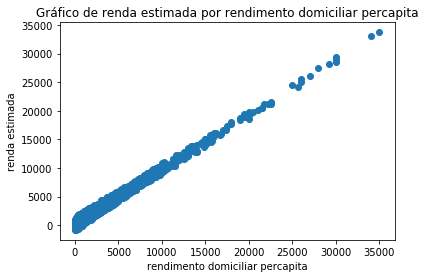

In [52]:
plt.scatter(Variaveis_Independentes_teste[:,5],renda_prevista)
plt.title('Gráfico de renda estimada por rendimento domiciliar percapita')
plt.ylabel('renda estimada')
plt.xlabel('rendimento domiciliar percapita')
plt.show()

Para se ter uma ideia melhor da relação de cada variável explicativa foram gerados alguns graficos gráficos de dispersão.
Nesse gráfico temos a relação entre a variável rendimento domiciliar percapita no eixo X e a renda prevista pelo modelo no eixo Y. Pode-se observar uma linha esplícita entre as duas variáveis o que indica uma grande relação entre as duas.

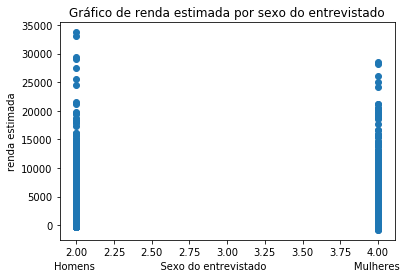

In [53]:
plt.scatter(Variaveis_Independentes_teste[:,1],renda_prevista)
plt.title('Gráfico de renda estimada por sexo do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('Homens                     Sexo do entrevistado                            Mulheres')
plt.show()

Nesse gráfico temos a relação entre a variável Sexo do entrevistado no eixo X e a renda prevista pelo modelo no eixo Y.

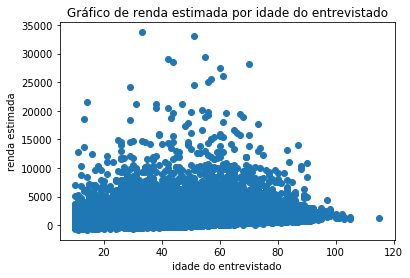

In [54]:
plt.scatter(Variaveis_Independentes_teste[:,2],renda_prevista)
plt.title('Gráfico de renda estimada por idade do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('idade do entrevistado')
plt.show()

Nesse gráfico temos a relação entre a variável idade do entrevistado no eixo X e a renda prevista pelo modelo no eixo Y.

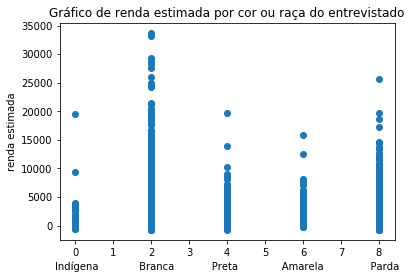

In [55]:
plt.scatter(Variaveis_Independentes_teste[:,3],renda_prevista)
plt.title('Gráfico de renda estimada por cor ou raça do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('Indígena             Branca            Preta              Amarela               Parda')
plt.show()

Nesse gráfico temos a relação entre a variável cor ou raça do entrevistado no eixo X e a renda prevista pelo modelo no eixo Y. Pode-se observar claramente nesse modelo a discrepância de renda entre diferenças cores ou raças.

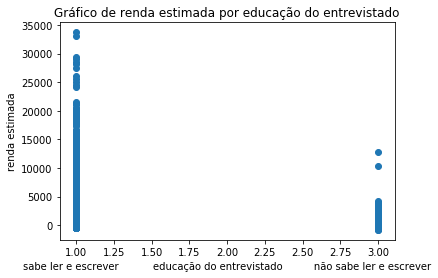

In [56]:
plt.scatter(Variaveis_Independentes_teste[:,4],renda_prevista)
plt.title('Gráfico de renda estimada por educação do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('sabe ler e escrever           educação do entrevistado          não sabe ler e escrever')
plt.show()

Nesse gráfico temos a relação entre a variável educação do entrevistadoo no eixo X e a renda prevista pelo modelo no eixo Y. Pode-se observar nesse gráfico claramente a diferença de renda de pessoas que sabem ler e escrever e as que não sabem, e isso ocorre realmente na realidade, o que comprova mais uma vez a qualidade do modelo.

___
## CONCLUSÃO

Dado que o objetivo do projeto era elaborar modelos preditivos de uma variável quantitativa e avaliar sua performance através de processos estatísticos de validação, pode-se concluir que os objetivos do projeto foram cumpridos, foram realizados dois modelos de predição da variavel quantitativa renda, o Modelo de Predição pela Média e o Modelo de Regressão Linear Múltipla, e posteriormente validados pelos métodos de avaliação da qualidade da predição, que indicaram que o modelo foi bem executado.